## CENTRALITY MEASURES
These are the measures we will apply to analyse the people collaborations' network

* Degree centrality
* Eigenvector centrality
* Closeness centrality 
* Betweenness centrality
* Connected components
* Clustering coefficient
* Community detection

# Degree centrality

We want to find out who are the most connected people in the network

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


with open("../graph_files/network2proj.gexf", 'r', encoding='utf-8') as f:
    
# Read the graph from the file
    n2 = nx.read_gexf(f)

degree = nx.degree_centrality(n2) # the function returns a dictionary with nodes as keys and degree as value
degree = sorted(degree.items(), key=lambda x: x[1], reverse=True) #sorting in descending order
total = len(degree) #saving the total nodes in the network

#filter out all nodes whose degree is 0.0
for tup in degree:
    if tup[1] == 0.0:
        degree.pop(degree.index(tup))

filtered = len(degree) # updated dimension of the network

net_percentage = (filtered*100) // total
print("the current network is " + str(net_percentage) + " percent of the initial one")
highest_degree = degree




the current network is 98 percent of the initial one


Now I will create a dataframe with relevant attributes of the people with highest degree.

In [67]:
def createDF(tuple_list):
    names= []
    measure= []
    role= []
    movies= [] #I want to retrieve the movies he collaborated in
    nconst = []

    for tup in tuple_list:
        edges = n2.edges(tup[0], data=True)
        edge_labels = [d['label'] for u, v, d in edges] # u and v are the endpoints of the edge, and d is a dictionary containing any edge attributes.
        nconst.append(tup[0])
        names.append(n2.nodes[tup[0]]['name'])
        measure.append(tup[1])
        role.append(n2.nodes[tup[0]]['role'])
        movies.append(edge_labels) #these are 257 movies for the person with the highest degree, it is not possible to put those in a df
                                    # we will need to do some computation on the fly to have a "movie importance rank kinda thing"

    df_data = {'nconst': nconst, 'name': names, 'roles': role, 'measure': measure, 'works' : movies}
    measure_rank = pd.DataFrame(df_data)
    return measure_rank

degree_df = createDF(highest_degree)
df = degree_df[["nconst", "name","roles", "measure"]]
df.to_csv("degree.csv")

# Eigenvector centrality

Eigenvector centrality is a measure of the importance of a node in a network based on the centrality of its neighboring nodes. In other words, it considers both the number of connections a node has and the importance of those connections. <br>
Key individuals may have a high number of collaborations, but more importantly, they collaborate with other key individuals in the network. This makes them more influential and potentially more important for the success of the collaborations

In the <code>eigenvector_centrality()</code> function, the <code>weight</code> parameter sets the <b>edge attribute</b> to use as weight for computing the measure.<br>
Since our edge is a movie, it would make sense to put as edge attribute the influence value computed from Network 1, in order to make this measure meaningful according to the importance of the movie that connects two people. Or, have a weight in terms of <b>country</b> attribute in order to highlight collaborations on East Asian movies

In [4]:
# returns a dictionary of nodes with eigenvector centrality as the value.

eigenvector = nx.eigenvector_centrality(n2, max_iter=1000)

values = []

eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

highest_eigenvector = eigenvector

for tup in highest_eigenvector:
    print(tup)


('nm0372942', 0.16769836434824734)
('nm0002031', 0.11702280101180426)
('nm0953123', 0.09984826036129019)
('nm0851537', 0.09353679952061277)
('nm0000581', 0.09250452786362423)
('nm0000406', 0.09137714078707712)
('nm0536941', 0.09111510406994863)
('nm0503777', 0.08580524228097451)
('nm0001328', 0.08564516199076809)
('nm0002030', 0.08479871044656977)
('nm0861703', 0.0840986397534976)
('nm0907003', 0.08117372688282819)
('nm0550892', 0.07864400661304938)
('nm0215877', 0.07840430433304797)
('nm0368871', 0.07797530705648269)
('nm0909825', 0.07727217077665534)
('nm0886754', 0.07606355572952471)
('nm0397022', 0.07585057380098514)
('nm0176699', 0.07578508854820164)
('nm0542534', 0.07331147136069123)
('nm0502752', 0.07307332654350657)
('nm0920074', 0.07295001876348117)
('nm0332539', 0.07018974923488087)
('nm0454771', 0.06874138782746761)
('nm0649183', 0.06761357307906757)
('nm0281808', 0.06750737651656177)
('nm0876223', 0.06713694808836544)
('nm0124918', 0.06428978490475115)
('nm0664990', 0.06395

In [5]:
df = createDF(highest_eigenvector)
df = df[["nconst", "name","roles", "measure"]]
df.to_csv("eigenvector.csv")


# connected components

There are many things that one can do with components, also generate the most strongly connected componest or the most weakly connected. Check Networkx documentation eventually.

In [51]:
components = nx.connected_components(n2)
sorted_components = sorted(components, key=len, reverse=True)

'''for c in sorted_components[:5]:
    # create a subgraph for the current component
    subgraph = n2.subgraph(sorted_components[0])'''

# n_components = nx.number_connected_components(n2) #3477
components_sets = [len(c) for c in sorted_components]
#print(components_sets)


# average clustering coefficient

In [16]:
subgraph = n2.subgraph(sorted_components[0])
clustering = nx.average_clustering(subgraph) 
print(clustering)
'''sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)

for tup in sorted_clustering[:20]:
    print(tup)

min_cluster = min(clustering, key=lambda x: x[1])
max_cluster = max(clustering, key=lambda x: x[1])

print("\n max: " + str(sorted_clustering[0]))
print("\n min: " + str(sorted_clustering[-1]))
'''

0.6870775949596085


'sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)\n\nfor tup in sorted_clustering[:20]:\n    print(tup)\n\nmin_cluster = min(clustering, key=lambda x: x[1])\nmax_cluster = max(clustering, key=lambda x: x[1])\n\nprint("\n max: " + str(sorted_clustering[0]))\nprint("\n min: " + str(sorted_clustering[-1]))\n'

# Community detection

In [22]:
louvain = nx.community.louvain_communities(subgraph, seed=123)
greedy = nx.community.greedy_modularity_communities(subgraph)
greedy = sorted(greedy[0])
print(louvain)
print(greedy)


[{'nm6583447', 'nm2021984', 'nm5141118', 'nm2769225', 'nm1939777', 'nm1625338', 'nm5140963'}, {'nm2271939', 'nm0822609', 'nm0846530', 'nm2399592', 'nm1085924', 'nm2980861', 'nm2551258', 'nm0481542', 'nm0872153', 'nm2655611', 'nm0469694', 'nm0971574', 'nm0567979', 'nm0689696', 'nm2548697', 'nm1201715', 'nm0565056', 'nm0407741', 'nm3872200', 'nm5557137', 'nm7778699', 'nm0949676', 'nm0375402', 'nm2676561', 'nm0253107', 'nm0712444', 'nm0158219', 'nm1318216', 'nm0308219', 'nm2095752', 'nm0485636', 'nm0850227', 'nm3106135', 'nm0320553', 'nm1279638', 'nm0058164', 'nm0714621', 'nm0888092', 'nm1359370', 'nm1234242', 'nm1095201', 'nm0063511', 'nm0110357', 'nm1679136', 'nm0303056', 'nm0809405', 'nm0121568', 'nm0420874', 'nm0650276', 'nm1761309', 'nm4570739', 'nm1368309', 'nm0383629', 'nm0540220', 'nm1341563', 'nm0315065', 'nm0192741', 'nm0365070', 'nm0541677', 'nm3230448', 'nm1834343', 'nm0817379', 'nm0744985', 'nm1691139', 'nm0818746', 'nm0427827', 'nm0294825', 'nm2478512', 'nm0002573', 'nm02641

In [98]:
 # print(len(louvain)) 86
louvain_sorted = sorted(louvain, key=len, reverse = True )
louvain_c_len = []
for community in louvain_sorted:
    louvain_c_len.append(len(community))

# see who are the people in the biggest communities
cineMAC_rank = pd.read_csv("../results/n2/N2_cineMAC_rank.csv")
#print(louvain_sorted[0]) len 4750
biggest_c = pd.DataFrame({'community' : list(louvain_sorted[0])})
biggest_c = pd.merge(cineMAC_rank, biggest_c, left_on="nconst", right_on="community", how="inner")
biggest_c.to_csv("../results/n2/community_detection/community_1.csv")
# second community
second_biggest_c = pd.DataFrame({'community' : list(louvain_sorted[1])})
second_biggest_c = pd.merge(cineMAC_rank, second_biggest_c, left_on="nconst", right_on="community", how="inner")
second_biggest_c.to_csv("../results/n2/community_detection/community_2.csv")
#third community
third_biggest_c = pd.DataFrame({'community' : list(louvain_sorted[2])})
third_biggest_c = pd.merge(cineMAC_rank, third_biggest_c, left_on="nconst", right_on="community", how="inner")
third_biggest_c.to_csv("../results/n2/community_detection/community_3.csv")
#fourth community
fourth_biggest_c = pd.DataFrame({'community' : list(louvain_sorted[3])})
fourth_biggest_c = pd.merge(cineMAC_rank, fourth_biggest_c, left_on="nconst", right_on="community", how="inner")
fourth_biggest_c.to_csv("../results/n2/community_detection/community_4.csv")
# fifth community
fifth_biggest_c = pd.DataFrame({'community' : list(louvain_sorted[4])})
fifth_biggest_c = pd.merge(cineMAC_rank, fifth_biggest_c, left_on="nconst", right_on="community", how="inner")
fifth_biggest_c.to_csv("../results/n2/community_detection/community_5.csv")


[4750,
 4405,
 1676,
 1517,
 1386,
 1289,
 1141,
 806,
 719,
 686,
 633,
 584,
 561,
 529,
 493,
 479,
 452,
 452,
 421,
 402,
 368,
 367,
 327,
 306,
 296,
 290,
 283,
 267,
 255,
 247,
 236,
 222,
 219,
 141,
 138,
 80,
 77,
 75,
 72,
 44,
 41,
 34,
 19,
 17,
 14,
 13,
 12,
 12,
 10,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3]

4750
3
41


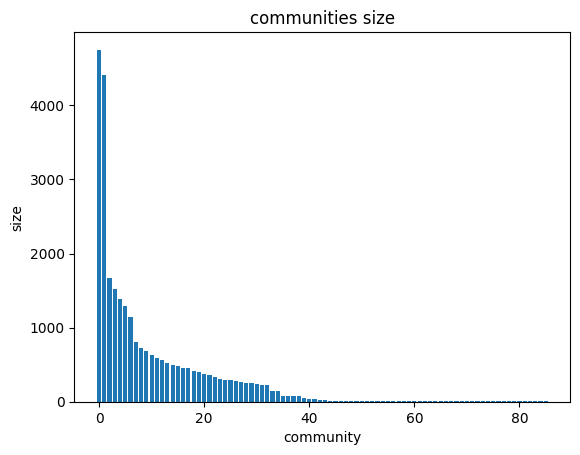

<Figure size 640x480 with 0 Axes>

In [99]:
print(louvain_c_len[0])
print(louvain_c_len[-1])
print(louvain_c_len[40])

import matplotlib.pyplot as plt

x = list(range(0, len(louvain_c_len)))
y = louvain_c_len

plt.bar(x, y)

plt.xlabel('community')
plt.ylabel('size')
plt.title('communities size')

plt.show()

plt.savefig('../results/n2/community_detection/communities_size.jpeg', dpi=300, bbox_inches='tight')

# Closeness centrality and Betwenness centrality

Please note that the code I used to calculate Closeness centrality and Betwennes centrality (below) is commented out. I took - on a network wit approximately 22000 nodes (condiseding just the 5 most numerous components, total nw was over 40000)- nearly 14 hours. I saved the result in a txt file in order to be able to access these data more comfortably at a later stage.

In [8]:
#closeness centrality
'''for c in sorted_components[:5]:
    # create a subgraph for the current component
    subgraph = n2.subgraph(c)
    
    # compute the closeness centrality for the current component
    closeness = nx.closeness_centrality(subgraph)
    
    # print the closeness centrality for each node in the component
    for node, centrality in closeness.items():
        print("Node {} has closeness centrality {}".format(node, centrality))'''

#betwennes centrality
'''for c in sorted_components[:5]:
    # create a subgraph for the current component
    subgraph = n2.subgraph(c)

    betweeness = nx.betweenness_centrality(subgraph)
    
    # print the closeness centrality for each node in the component
    for node, centrality in sorted(betweeness.items(), key=lambda x: x[1], reverse=True):
        print("Node {} has betwenness centrality {}".format(node, centrality))'''


betwenness = open("../datasets/betwenness.txt", "r")
closeness = open("../datasets/closness_centrality.txt", "r")
 
def create_tup_list(file, value_list):
    for line in file:
        line = line.rstrip()
        words = line.split(" ")
        if words[-1] != '0.0': # if value is 0.0 remove
            tup = (words[1], float(words[-1]))
            value_list.append(tup)
    return value_list

betwenness_list = []
closeness_list = []
betwenness_values = create_tup_list(betwenness, betwenness_list)
closeness_values = create_tup_list(closeness, closeness_list)

betwenness.close()
closeness.close()

Now visualize betwenness' results:

In [9]:
for tup in betwenness_values:
    print(tup)


('nm0000636', 0.02606911777595779)
('nm0000339', 0.019059521608900093)
('nm0204862', 0.017114773046759093)
('nm0281507', 0.016899771697342404)
('nm0406772', 0.015296300076494247)
('nm0324875', 0.014969859729868602)
('nm0372942', 0.014218035735378269)
('nm0000041', 0.0121801170762063)
('nm0322946', 0.012128714292970768)
('nm0586969', 0.01208197593191623)
('nm0000229', 0.01205003863363551)
('nm0001801', 0.011743381076384625)
('nm0007139', 0.011574292301976001)
('nm0000175', 0.011383899826026504)
('nm0004976', 0.01137692908746441)
('nm0393094', 0.011352399021130215)
('nm0000247', 0.011062367504596781)
('nm0748784', 0.01061693356733859)
('nm0000600', 0.010544208933902528)
('nm0005428', 0.010501650717345011)
('nm0849083', 0.010432766072987869)
('nm0224537', 0.010332373422858403)
('nm0000590', 0.010133186912334703)
('nm0522454', 0.010132724319608405)
('nm0083696', 0.010051821823983146)
('nm0791217', 0.009939614682651773)
('nm0297935', 0.00942354628495639)
('nm0001379', 0.009206287976820667)


Now visualize closeness' results:

In [10]:
closeness_sorted = sorted(closeness_values, key=lambda x: x[1], reverse=True) #no items because it's a list not a dict
for tup in closeness_sorted:
    print(tup)

('nm1017500', 0.7083333333333334)
('nm7869716', 0.6538461538461539)
('nm3125601', 0.6333333333333333)
('nm0325181', 0.625)
('nm3329072', 0.59375)
('nm4765142', 0.5862068965517241)
('nm1993920', 0.5555555555555556)
('nm4461680', 0.5483870967741935)
('nm7008275', 0.5483870967741935)
('nm7187470', 0.5483870967741935)
('nm2402050', 0.5277777777777778)
('nm1442694', 0.5263157894736842)
('nm0740427', 0.5128205128205128)
('nm3146718', 0.5)
('nm0550521', 0.4878048780487805)
('nm3244902', 0.48717948717948717)
('nm10431442', 0.48717948717948717)
('nm3063966', 0.48717948717948717)
('nm2591458', 0.4857142857142857)
('nm4193081', 0.4857142857142857)
('nm5668578', 0.475)
('nm5311712', 0.475)
('nm1788605', 0.475)
('nm5349173', 0.4722222222222222)
('nm1706468', 0.4722222222222222)
('nm1936347', 0.4722222222222222)
('nm6482501', 0.4722222222222222)
('nm5149457', 0.4722222222222222)
('nm5349154', 0.4722222222222222)
('nm3095307', 0.46511627906976744)
('nm4113381', 0.46511627906976744)
('nm1645871', 0.46

Create betwenness DF:

In [25]:
highest_betwenness = betwenness_values
df = createDF(highest_betwenness)
df = df[["nconst", "name","roles", "measure"]]
df.to_csv("betweenness.csv")


Create closeness DF:

In [26]:
highest_closeness = closeness_sorted
df = createDF(highest_closeness)
df = df[["nconst", "name","roles", "measure"]]
df.to_csv("closeness.csv")


# retrieving most influential movie for each people in our rank

The final rank has been computed in <code>n2_weighted_average.py</code>

In [97]:
collab_db = pd.read_csv("../results/n2/N2_cineMAC_rank_top20.csv") #only first 20
citations_df = pd.read_csv("../results/graph1-tables/N1_cineMAC_rank.csv") #all 26849
# add rank position to df
rank = list(range(0, len(citations_df)))
citations_df['rank'] = rank


#retrieve info about films
collab_merged = pd.merge(collab_db, degree_df, left_on="nconst", right_on="nconst", how="inner")
collab_merged = collab_merged[["nconst", "name_x", "roles_x", "works"]]

collab_merged = collab_merged.explode('works')
citation_merge = pd.merge(collab_merged, citations_df, left_on="works", right_on="tconst", how="left")
merged_df = citation_merge[["nconst", "name_x", "roles_x", "works", "tconst","rank", "CineMAC rank", "Film"]]
merged_df = merged_df.sort_values(by='CineMAC rank', ascending=False)
merged_df = merged_df.drop_duplicates(subset="nconst", keep="first") # only keep the highest ranking movie



'''for el in weighted_df["CineMAC rank"].items():
    print(el)'''
merged_df.to_csv("../results/n2/film_positioning.csv")
merged_df

nconst              name_x          roles_x      works     tconst  \
454   nm0002031      Michael Curtiz         director  tt0034583  tt0034583   
195   nm0372942           Ben Hecht  writer,director  tt0086250  tt0086250   
21    nm3329072     Tiffany Caprice         producer  tt1409805  tt1409805   
106   nm2591458       J.D. Lifshitz         producer  tt2281159  tt2281159   
116   nm4765142           Andy Yoon           writer  tt2025506  tt2025506   
46    nm3146718        Eric England         director  tt2281159  tt2281159   
8     nm1017500       Sang-hoon Ahn  writer,director  tt2025506  tt2025506   
102   nm4193081    Raphael Margules         producer  tt2281159  tt2281159   
63    nm6091305    Craig Walendziak           writer  tt4444798  tt4444798   
85    nm2402050   B. Harrison Smith  director,writer  tt2002789  tt2002789   
121  nm10431442    Jonathan Ilchert         producer  tt2002789  tt2002789   
95    nm1442694        Brant Sersen         director  tt0379184  tt0379184   
79    nm0740427           Kirk Roos         producer  tt4998772  tt4998772   
42    nm7869716             Gigi Qi         producer  tt5662906  tt5662906   
51    nm1993920       Anisa Qureshi         producer  tt1254696  tt1254696   
67    nm4251668  Eric B. Fleischman         producer  tt4045894  tt4045894   
17    nm3125601     Brian Gallagher         producer  tt1504353  tt1504353   
30    nm0325181     Darren Goldberg         producer  tt1935902  tt1935902   
126   nm3510596       Sean Tabibian         producer  tt4045894  tt4045894   
107   nm6482501            Peng Ren           writer  tt3720058  tt3720058   

        rank  CineMAC rank                                             Film  
454      8.0      0.004407                                Casablanca (1942)  
195     24.0      0.002883                                  Scarface (1983)  
21    4785.0      0.000056  Swooped: Based on a Real Life Occurrence (2011)  
106  10318.0      0.000023                                Contracted (2013)  
116  10755.0      0.000023                            Beul-la-in-deu (2011)  
46   10318.0      0.000023                                Contracted (2013)  
8    10755.0      0.000023                            Beul-la-in-deu (2011)  
102  10318.0      0.000023                                Contracted (2013)  
63   11624.0      0.000021                             DeS.O.L.ation (2013)  
85   12863.0      0.000019                         6 Degrees of Hell (2012)  
121  12863.0      0.000019                         6 Degrees of Hell (2012)  
95   13575.0      0.000019        Blackballed: The Bobby Dukes Story (2004)  
79   17638.0      0.000006                                 Bedeviled (2016)  
42   23718.0      0.000006                              Zhuo mi cang (2016)  
51   25921.0      0.000006                             Splinterheads (2009)  
67   25566.0      0.000006                              Get the Girl (2017)  
17   17214.0      0.000006                                    Booted (2011)  
30   22344.0      0.000006                          The Brass Teapot (2012)  
126  25566.0      0.000006                              Get the Girl (2017)  
107  24989.0      0.000006                           Cui mian da shi (2014)